<a href="https://colab.research.google.com/github/diogoalmeida1991/neuralnetworksstudies/blob/main/Redes_Neurais_Classificacao_Binaria_Adaline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Adaline - Implementação e Teste do Algoritmo

Importação das Bibliotecas

In [ ]:
from sklearn import preprocessing # Biblioteca para suporte ao pré-processamento
from sklearn.model_selection import train_test_split # Biblioteca para separação de amostras para treino e teste
import matplotlib.pyplot as plt # Para visualizacao dos dados e do erro
import numpy as np # Biblioteca de manipulacao de arrays Numpy
from matplotlib.colors import ListedColormap # Lista de cores para plotagens
import pandas as pd

Definição e Implementação da Classe Adaline

In [ ]:
# Classe Adaline
class Adaline:
    # Construtor com informações setadas com o número de épocas máxima (epoch) e taxa de aprendizagem (eta)
    def __init__(self, eta = 0.001, epoch = 1000, goal = 0.000001):
        self.eta = eta # Taxa de aprendizagem, utilizada para impulsionar o movimento do hiperplano na separação de classes
        self.epoch = epoch # Determinação máxima de épocas no ajuste da RNA
        self.epochs = 0 # Contabilização do número de épocas no treinamento
        self.errorsTests = 0 # Utilizado para contabilizar a quantidade de amostras classificadas incorretamente nos testes da rede já treinada
        self.goal = goal # Definição do objetivo com parada definida no treinamento que é comparado com o cálculo do erro quadrático da época anterior com a atual

    # Método para treinamento da rede
    def fit(self, X, y):
        # Inicialização dos pesos randomicamente - shape retorna a dimensão das entradas da RNA
        self.weight_ = np.random.uniform(-1, 1, X.shape[1] + 1)
        self.error_ = []
        self.mse_ = []
        self.mse = 0
        self.cost = 0
        cont = 1

        for _ in range(self.epoch):
            # Obtenção da saída da rede baseada nos pesos sinápticos ajustados
            output = self.activation_function(X) # Valor do u
            # y é a saída desejada e output é a saída calculada, obtem-se um valor real
            error = y - output # verificação do erro

            # Ajuste do limiar de ativação
            self.weight_[0] += self.eta * sum(error)
            # Ajuste dos pesos sinápticos - Minimização do erro quadrático médio com a aplicação do gradiente do erro E(w)
            self.weight_[1:] += self.eta * X.T.dot(error) # dot efetua a multiplicação de matrizes, T calcula a transposta de X para poder efetuar a multiplicação segundo a regra - https://acervolima.com/diferenca-entre-a-operacao-numpy-dot-e-em-python/

            # Cálculo do erro quadrático E(w)
            self.cost = 1./2 * sum((error**2))

            # Armazena em mseP o mse da época anterior para poder comparar com o atual
            mseP = self.mse

            # Cálculo do erro quadrático médio mse(w) da época atual
            self.mse = 1./X.shape[0] * sum((error**2))

            # Atualização do número de épocas
            self.epochs += 1

            # Permite verificar a diferença do erro somente na segunda passagem
            if self.epochs > 1:
                # Verfica se a diferença entre o erro da época anterior com a atual é menor que o objetivo pré-determinado
                if  mseP-self.mse < self.goal:
                    break

            # Armazena os erros quadráticos e os erros quadráticos médios em listas
            self.error_.append(self.cost)
            self.mse_.append(self.mse)

        return self

    def net_input(self, X):
        # Calcula a entrada da rede por meio de um produto escalar (dot) dos valores de entrada com os pesos (Combinador Linear)
        return np.dot(X, self.weight_[1:]) + self.weight_[0]

    def activation_function(self, X):
        # Função de ativação que recebe o retorno do cálculo do método net_input
        return self.net_input(X)

    def predict(self, X, y_d): # y_d = saída desejada utilizada para verificar a acurácia no teste
        # Obtenção da saída calculada baseada no conjunto de entradas calculado com os pesos ajustados obtenção final pautada na função de ativação
        y = np.where(self.activation_function(X) >= 0.0, 1, -1)

        # Verificação se a amostra testada apresentou erro na classificação
        if y != y_d:
            self.errorsTests = self.errorsTests + 1
            return 'Erro'
        return 'Acerto'

Carregamento do Dataset e Manipulação Inicial com Pandas e Numpy

In [ ]:
# Caminho do dataset no Google Drive que será carregado em df
df = pd.read_csv("valvulas.csv")

# Separando a coluna da classe das 100 primeiras amostras do dataset
y_train = df.iloc[0:100, 4].values

y_train = np.where(y_train == -1., -1, 1)

print(y_train)
# Separando as colunas com as variáveis das 100 primeiras amostras do dataset para determinar os inputs da RNA
X_train = df.iloc[0:100, [0,1,2,3]].values
print(X_train)


[-1 -1 -1  1  1  1  1 -1  1 -1 -1  1  1 -1 -1  1 -1 -1  1  1 -1 -1  1 -1
  1 -1  1 -1  1  1  1 -1 -1 -1]
[[ 3.0240e-01  2.2860e-01  8.6300e-01  2.7909e+00]
 [ 1.3490e-01 -6.4450e-01  1.0530e+00  5.6870e-01]
 [ 3.3740e-01 -1.7163e+00  3.6700e-01 -6.2830e-01]
 [ 1.1434e+00 -4.8500e-02  6.6370e-01  1.2606e+00]
 [ 1.3749e+00 -5.0710e-01  4.4640e-01  1.3009e+00]
 [ 7.2210e-01 -7.5870e-01  7.6810e-01 -5.5920e-01]
 [ 4.4030e-01 -8.0720e-01  5.1540e-01 -3.1290e-01]
 [-5.2310e-01  3.5480e-01  2.5380e-01  1.5776e+00]
 [ 3.2550e-01 -2.0000e+00  7.1120e-01 -1.1209e+00]
 [ 5.8240e-01  1.3915e+00 -2.2910e-01  4.1735e+00]
 [ 1.3400e-01  6.0810e-01  4.4500e-01  3.2230e+00]
 [ 1.4800e-01 -2.9880e-01  4.7780e-01  8.6490e-01]
 [ 7.3590e-01  1.8690e-01 -8.7200e-02  2.3584e+00]
 [ 7.1150e-01 -1.1469e+00  3.3940e-01  9.5730e-01]
 [ 8.2510e-01 -1.2840e+00  8.4520e-01  1.2382e+00]
 [ 1.5690e-01  3.7120e-01  8.8250e-01  1.7633e+00]
 [ 3.3000e-03  6.8350e-01  5.3890e-01  2.8249e+00]
 [ 4.2430e-01  8.3130e-01  2

Gráfico para Análise das Amostras por Variáveis

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

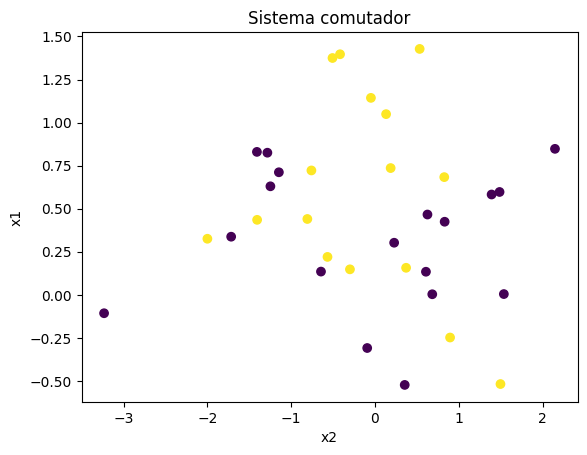

In [ ]:
# Plotando o gráfico para verificação se as amostras são linearmente separáveis
plt.scatter(X_train[:,1],X_train[:,0],c=y_train)
plt.title("Sistema comutador" )
plt.xlabel('x2')
plt.ylabel('x1')
plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

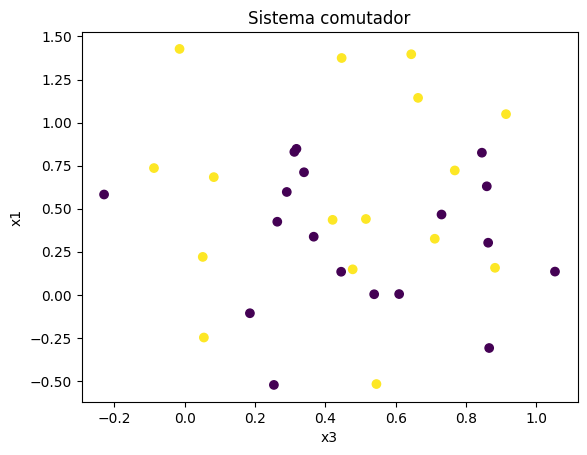

In [ ]:
# Plotando o gráfico para verificação se as amostras são linearmente separáveis
plt.scatter(X_train[:,2],X_train[:,0],c=y_train)
plt.title("Sistema comutador" )
plt.xlabel('x3')
plt.ylabel('x1')
plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

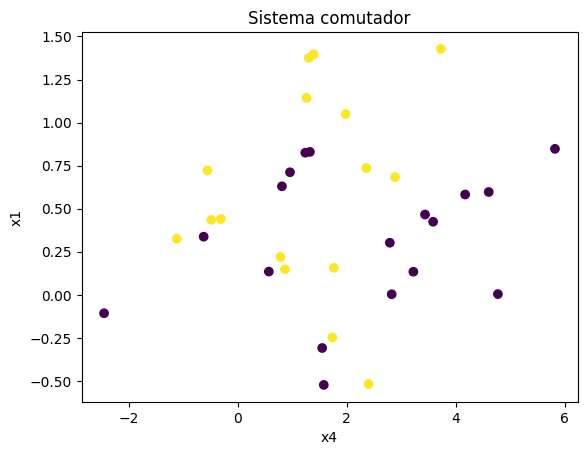

In [ ]:
# Plotando o gráfico para verificação se as amostras são linearmente separáveis
plt.scatter(X_train[:,3],X_train[:,0],c=y_train)
plt.title("Sistema comutador" )
plt.xlabel('x4')
plt.ylabel('x1')
plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

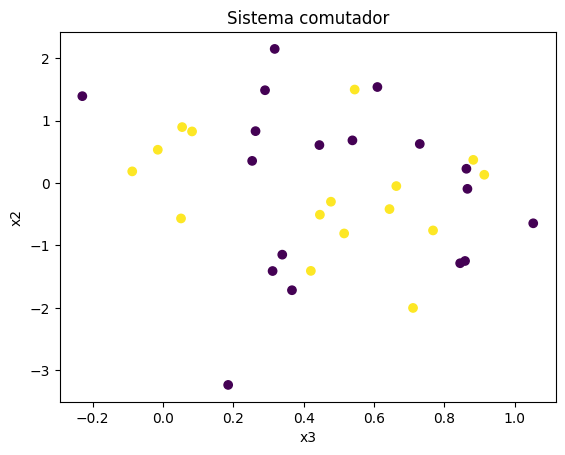

In [ ]:
# Plotando o gráfico para verificação se as amostras são linearmente separáveis
plt.scatter(X_train[:,2],X_train[:,1],c=y_train)
plt.title("Sistema comutador" )
plt.xlabel('x3')
plt.ylabel('x2')
plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

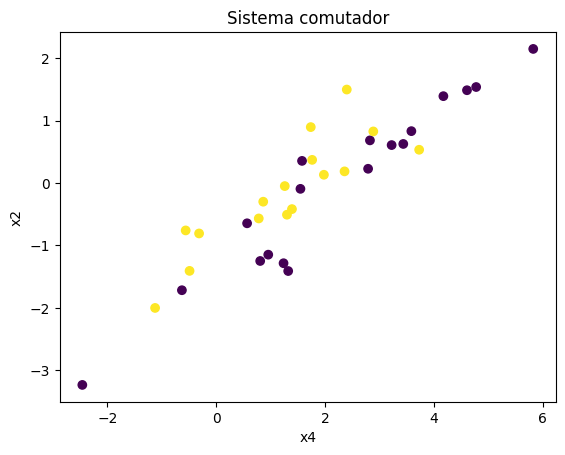

In [ ]:
# Plotando o gráfico para verificação se as amostras são linearmente separáveis
plt.scatter(X_train[:,3],X_train[:,1],c=y_train)
plt.title("Sistema comutador" )
plt.xlabel('x4')
plt.ylabel('x2')
plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

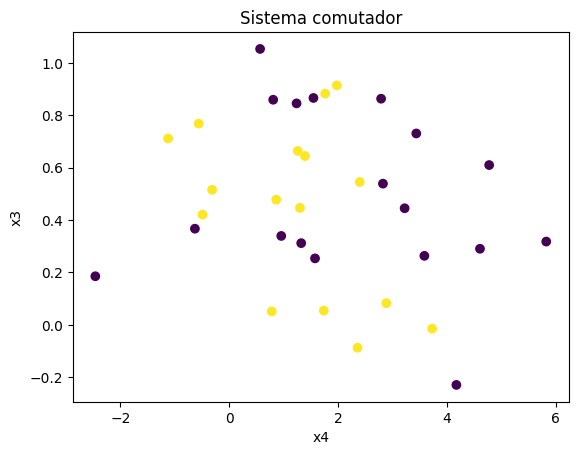

In [ ]:
# Plotando o gráfico para verificação se as amostras são linearmente separáveis
plt.scatter(X_train[:,3],X_train[:,2],c=y_train)
plt.title("Sistema comutador" )
plt.xlabel('x4')
plt.ylabel('x3')
plt

In [ ]:
# Caminho do dataset no Google Drive que será carregado em df
df = pd.read_csv("valvulasTestes.csv")

# Separando a coluna da classe das 100 primeiras amostras do dataset
y_test = df.iloc[0:100, 4].values

y_test = np.where(y_test == -1., -1, 1)

print(y_test)
# Separando as colunas com as variáveis das 100 primeiras amostras do dataset para determinar os inputs da RNA
X_test = df.iloc[0:100, [0,1,2,3]].values
print(X_test)

[-1  1 -1 -1  1  1  1  1 -1 -1  1 -1 -1  1]
[[ 0.5427  1.3832  0.639   4.0352]
 [ 0.6081 -0.9196  0.5925  0.1016]
 [-0.1618  0.4694  0.203   3.0117]
 [ 0.187  -0.2578  0.6124  1.7749]
 [ 0.4891 -0.5276  0.4378  0.6439]
 [ 0.3777  2.0149  0.7423  3.3932]
 [ 1.1498 -0.4067  0.2469  1.5866]
 [ 0.9325  1.095   1.0359  3.3591]
 [ 0.506   1.3317  0.9222  3.7174]
 [ 0.0497 -2.0656  0.6124 -0.6585]
 [ 0.4004  3.5369  0.9766  5.3532]
 [-0.1874  1.3343  0.5374  3.2189]
 [ 0.506   1.3317  0.9222  3.7174]
 [ 1.6375 -0.7911  0.7537  0.5515]]


Pré-Processamento para Normalizar os Dados e Separar Amostras para Treino e Teste

In [ ]:
# Normalização dos dados sklearn - dados entre 0 e 1 - https://pt.linux-console.net/?p=5847
#scaler = preprocessing.MinMaxScaler()
#X_train = scaler.fit_transform(X_train)
#scaler = preprocessing.MinMaxScaler()
#X_test = scaler.fit_transform(X_test)

Treinamento da Rede Neural Artificial Adaline

In [ ]:
# Criando as fronteiras de decisão com Adaline
rede = Adaline(eta = 0.001, epoch = 5000, goal = 0.0001)
rede.fit(X_train, y_train)

Apresentação Gráfica do Processo de Treinamento

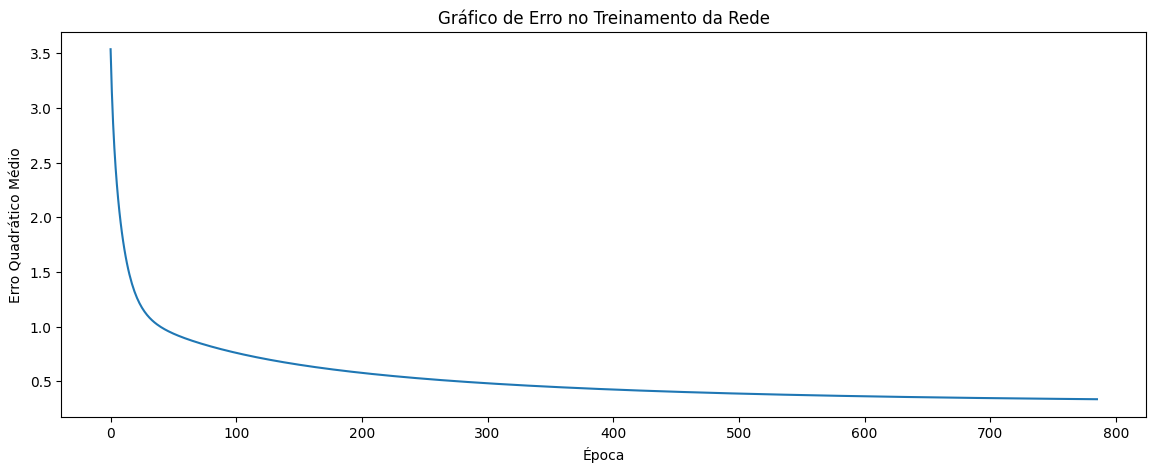

In [ ]:
# Plotando o gráfico da descida do gradiente no processo de treinamento
plt.figure(figsize=(14,5))
ax = plt.subplot()
ax.plot(range(len(rede.mse_)), rede.mse_)
ax.set_ylabel('Erro Quadrático Médio')
ax.set_xlabel('Época')
ax.set_title('Gráfico de Erro no Treinamento da Rede')
plt.show()

Apresentação das Métricas do Processo de Treinamento e Validação

In [ ]:
# Testando a rede em lote de amostras
print("\nClassificações dos testes com amostras não apresentadas no treinamento:")

# For entrada, saida in zip(X_test, y_test):
nTests = len(y_test)
for i in range(nTests):
    rede.predict(X_test[i,:], y_test[i])

print("Acurácia: ", (nTests-rede.errorsTests)/nTests*100, "%")
print("Quantidade de erros no teste em lote: ", rede.errorsTests)
print("Número de épocas do treinamento da RNA: ", rede.epochs)
print("Erro quadrático médio final (MSE - Eqm(w)): ", rede.mse)
print("Erro quadrático final (QE - E(w) - Custo): ", rede.cost)
print("Vetor de pesos finais da RNA treinada - Limiar = ", rede.weight_[0], "Pesos das entradas = ", rede.weight_[1:])


Classificações dos testes com amostras não apresentadas no treinamento:
Acurácia:  100.0 %
Quantidade de erros no teste em lote:  0
Número de épocas do treinamento da RNA:  787
Erro quadrático médio final (MSE - Eqm(w)):  0.33649553656635944
Erro quadrático final (QE - E(w) - Custo):  5.720424121628111
Vetor de pesos finais da RNA treinada - Limiar =  1.3060135556555603 Pesos das entradas =  [ 1.19617298  1.35332662 -0.15746859 -0.97804655]


Teste de Amostras Isoladas no Modelo Treinado

In [ ]:
# Teste individual de amostras
A1 = np.array([0.9694, 0.6909, 0.4334, 3.4965]) # Padrão correto = -1
A1_y = np.array(-1)
A2 = np.array([0.5427, 1.3832, 0.6390, 4.0352]) # Padrão correto = -1
A2_y = np.array(-1)
A3 = np.array([0.6081, -0.9196, 0.5925, 0.1016]) # Padrão correto = 1
A3_y = np.array(1)
A4 = np.array([-0.1618, 0.4694, 0.2030, 3.0117]) # Padrão correto = -1
A4_y = np.array(-1)
A5 = np.array([0.1870, -0.2578, 0.6124, 1.7749]) # Padrão correto = -1
A5_y = np.array(-1)
A6 = np.array([0.4891, -0.5276, 0.4378, 0.6439]) # Padrão correto = 1
A6_y = np.array(1)
A7 = np.array([0.3777, 2.0149, 0.7423, 3.3932]) # Padrão correto = 1
A7_y = np.array(1)
A8 = np.array([1.1498, -0.4067, 0.2469, 1.5866]) # Padrão correto = 1
A8_y = np.array(1)
A9 = np.array([0.9325, 1.0950, 1.0359, 3.3591]) # Padrão correto = 1
A9_y = np.array(1)
A10 = np.array([0.5060, 1.3317, 0.9222, 3.7174]) # Padrão correto = -1
A10_y = np.array(-1)
A11 = np.array([0.0497, -2.0656, 0.6124, -0.6585]) # Padrão correto = -1
A11_y = np.array(-1)
A12 = np.array([0.4004, 3.5369, 0.9766, 5.3532]) # Padrão correto = 1
A12_y = np.array(1)
A13 = np.array([-0.1874, 1.3343, 0.5374, 3.2189]) # Padrão correto = -1
A13_y = np.array(-1)
A14 = np.array([0.5060, 1.3317, 0.9222, 3.7174]) # Padrão correto = -1
A14_y = np.array(-1)
A15 = np.array([1.6375, -0.7911, 0.7537, 0.5515]) # Padrão correto = 1
A15_y = np.array(1)


print("Apresentação dos testes individuais:")
print ("Amostra A1 - Padrão desejado = -1 -> ", rede.predict(A1, A1_y))
print ("Amostra A2 - Padrão desejado = -1 -> ", rede.predict(A2, A2_y))
print ("Amostra A3 - Padrão desejado = 1 -> ", rede.predict(A3, A3_y))
print ("Amostra A4 - Padrão desejado = -1 -> ", rede.predict(A4, A4_y))
print ("Amostra A5 - Padrão desejado = -1 -> ", rede.predict(A5, A5_y))
print ("Amostra A6 - Padrão desejado = 1 -> ", rede.predict(A6, A6_y))
print ("Amostra A7 - Padrão desejado = 1 -> ", rede.predict(A7, A7_y))
print ("Amostra A8 - Padrão desejado = 1 -> ", rede.predict(A8, A8_y))
print ("Amostra A9 - Padrão desejado = 1 -> ", rede.predict(A9, A9_y))
print ("Amostra A10 - Padrão desejado = -1 -> ", rede.predict(A10, A10_y))
print ("Amostra A11 - Padrão desejado = -1 -> ", rede.predict(A11, A11_y))
print ("Amostra A12 - Padrão desejado = 1 -> ", rede.predict(A12, A12_y))
print ("Amostra A13 - Padrão desejado = -1 -> ", rede.predict(A13, A13_y))
print ("Amostra A14 - Padrão desejado = -1 -> ", rede.predict(A14, A14_y))
print ("Amostra A15 - Padrão desejado = 1 -> ", rede.predict(A15, A15_y))

Apresentação dos testes individuais:
Amostra A1 - Padrão desejado = -1 ->  Acerto
Amostra A2 - Padrão desejado = -1 ->  Acerto
Amostra A3 - Padrão desejado = 1 ->  Acerto
Amostra A4 - Padrão desejado = -1 ->  Acerto
Amostra A5 - Padrão desejado = -1 ->  Acerto
Amostra A6 - Padrão desejado = 1 ->  Acerto
Amostra A7 - Padrão desejado = 1 ->  Acerto
Amostra A8 - Padrão desejado = 1 ->  Acerto
Amostra A9 - Padrão desejado = 1 ->  Acerto
Amostra A10 - Padrão desejado = -1 ->  Acerto
Amostra A11 - Padrão desejado = -1 ->  Acerto
Amostra A12 - Padrão desejado = 1 ->  Acerto
Amostra A13 - Padrão desejado = -1 ->  Acerto
Amostra A14 - Padrão desejado = -1 ->  Acerto
Amostra A15 - Padrão desejado = 1 ->  Acerto
